# PCA

## Наводящие размышления

Если размерность исходных данных велика, то можно отбросить некоторые признаки и не включать их в рассмотрение.

Тогда встает вопрос: "Как же определить, что мы не отказались от чего-то важного?"

Как вариант, можно синтезировать новые признаки, размерность которых будет не так велика. В таком случае мы потеряем какое-то количество информации, но сделаем новые признаки максимально информативными.

Цель PCA - уменьшение размерности входных данных с минимальными потерями в информативности за счет подбора новой системы координат. Мы не отбрасываем данные, а делаем некоторую композицию, имеющую меньшую размерность.

## Идея метода на частном примере

x_1, x_2, ..., x_n - набор объектов

x_i = (x_i1, x_i2), i = {1, 2, ..., n}


In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(0, 6, step=0.2)
Y = np.random.uniform(-1, 4, X.shape[0])


In [2]:
def plot(X, Y, plot_type: str, **kwargs):
    plt.axvline(0, color="black")
    plt.axhline(0, color="black")
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.grid()
    plt.__getattribute__(plot_type)(X, Y, **kwargs)

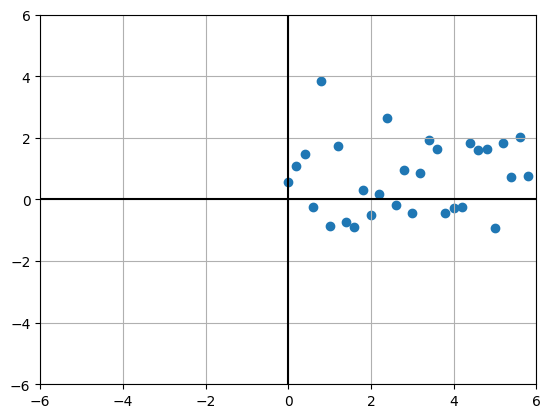

In [3]:
plot(X, Y, plot_type="scatter")

Выполним центрирование - из каждой точки вычтем среднее значение всей выборки

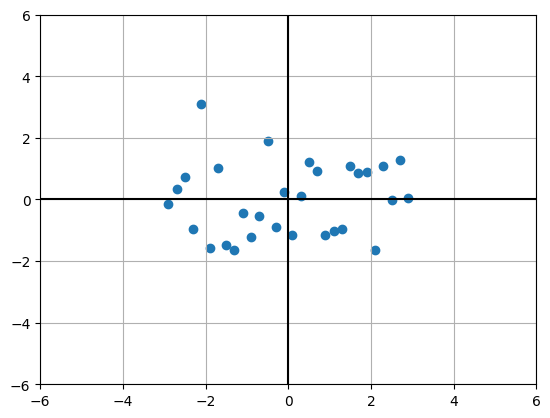

In [4]:
X_centered = X - np.mean(X)
Y_centered = Y - np.mean(Y)

plot(X_centered, Y_centered, plot_type="scatter")

После уменьшения размерности каждому объекту x_i = (x_i1, x_i2) будет соответствовать единственное число z_i

$$ Z = (z_1, z_2, ..., z_n) $$

где Z - новые координатая всех объектов

По сути, объекты станут точками на некоторой прямой

In [5]:
# прямая, на которую будут проецироваться объекты

X_line = np.array([-6, 6])
Y_line = np.array([-6, 6])

In [6]:
# проецирование объектов на прямую

from functions import projection

projections = [
    projection((1, 1), (X_centered[i], Y_centered[i]))
    for i in range(len(X_centered))
]

X_proj = [p[0] for p in projections]
Y_proj = [p[1] for p in projections]

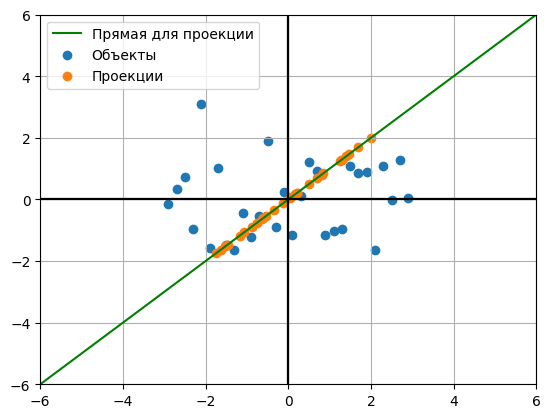

In [8]:
plot(X_line, Y_line, plot_type="plot", c='green', label='Прямая для проекции')
plot(X_centered, Y_centered, plot_type="scatter", label='Объекты')
plot(X_proj, Y_proj, plot_type="scatter", label='Проекции')

plt.legend()
plt.show()

Очевидно, что при уменьшении размерности теряется какая-то информация. Для минимизации потерь новые координаты должны как можно сильнее различаться между собой.

В качестве меры различия используется **выборочная дисперсия**:

$$ S^2(Z_1) = {1 \over n} \sum_{i=1}^n (z_i - \overline{Z_1}) $$

$$ \overline{Z_1} = {1 \over n} \sum_{i=1}^n Z_i $$

**Первая главная компонента** - прямая, проходящая через начало координат, координаты проекций центрированных исходных объектов на которую боладают наибольшей выборочной дисперсией

Направляющий вектор $ \phi $ ГК, имеющий длину 1, называется **вектором весов первой ГК**.

Если пространство двумерное, то $\phi$ имеет координаты ${\phi}_1$ и ${\phi}_2$

Задача уменьшения размерности сводится к поиску такого способа проведения прямой, чтобы координаты проекций точек на эту прямую различались наиболее сильно, то есть обладали наибольшей выборочной дисперсией

Первая ГК:
- Проходит через начало координат
- Координаты проекций максимально различаются между собой

Вторая и последующие ГК:
- Проходят через начало координат
- Ортогональны всем ранее построенным ГК
- Обеспечивают максимизацию выборочной дисперсии